# Introduction

For our metric, we decided that we would focus on safety and well being to decide which neighborhood is considered the best. We decided that neighborhoods that are more safe to residents such as having lower fire incidents and lower criminal activity while also having places for the community to interact would be seen as the best neighborhoods. By putting together the fire incidents, criminal activity, and park availability the neighborhood who best matches all three aspects would be chosen as the best neighborhood.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Sub-metric 1

This uses a data set that has collected all of the fire reports since 2015. Here, each neighborhood is assessed by how many total fire reports have occurred in it, with fewer reported fires being better and vice versa.

In [6]:
df = pd.read_csv("Fire-Incidents.csv")
df.head()
neighborhood_dict = dict()
for index, row in df.iterrows():
    if pd.notna(row.iloc[9]):
        if row.iloc[9] in neighborhood_dict:
            neighborhood_dict[row.iloc[9]] += 1
        else:
            neighborhood_dict[row.iloc[9]] = 1
neighborhood_dict['Mt. Oliver'] += neighborhood_dict['Mount Oliver Borough']
del neighborhood_dict['Mount Oliver Borough']

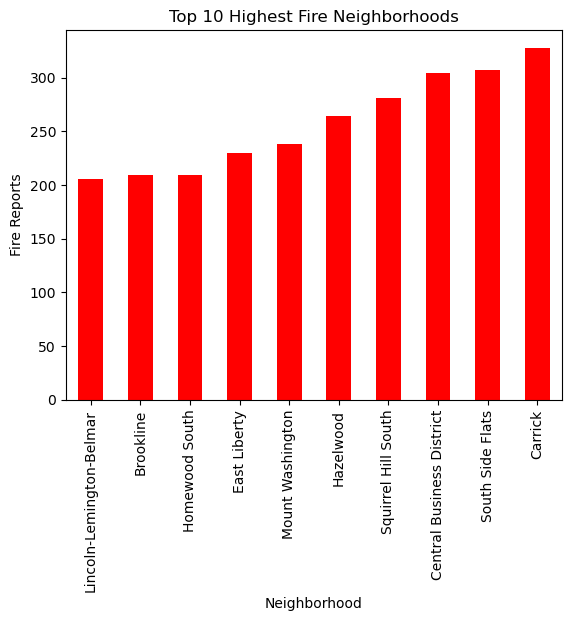

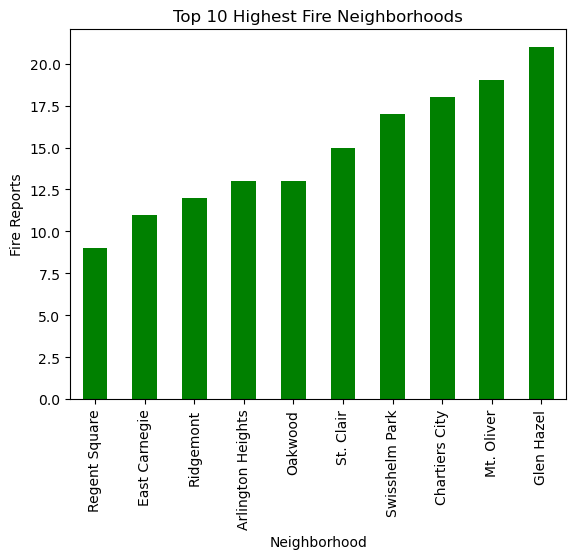

In [26]:
data_series = pd.Series(neighborhood_dict)
sorted_series = data_series.sort_values()
bottom_10 = sorted_series.head(10)
top_10 = sorted_series.tail(10)

top_10.plot(kind='bar', color = 'red', title = 'Top 10 Highest Fire Neighborhoods', xlabel = 'Neighborhood', ylabel = 'Fire Reports')
plt.show()
bottom_10.plot(kind='bar', color = 'green', title = 'Top 10 Highest Fire Neighborhoods', xlabel = 'Neighborhood', ylabel = 'Fire Reports')
plt.show()

In [8]:
point_dict = {}
points = 100

for index, value in sorted_series.items():
    point_dict[index] = points
    points -= 1

#### Conclusion for Sub-metric 1

The best neighborhoods according to this metric are Regent Square, East Carnegie, and Ridgemont. The top ranked neighborhoods are both safer from any possibly severe fire and by extension, newer, as newer buildings tend to be equipped with better fire prevention mechanism. This means the top neighborhoods for this metric encapsulate both safety and modernity.

# Sub-metric 2

This notebook shows crime incidents as reported by the Pittsburgh Bureau of Police. Each time a report is filed, the neighborhood where it occurred is recorded. The higher the number for each neighborhood, the more crime that happened there.

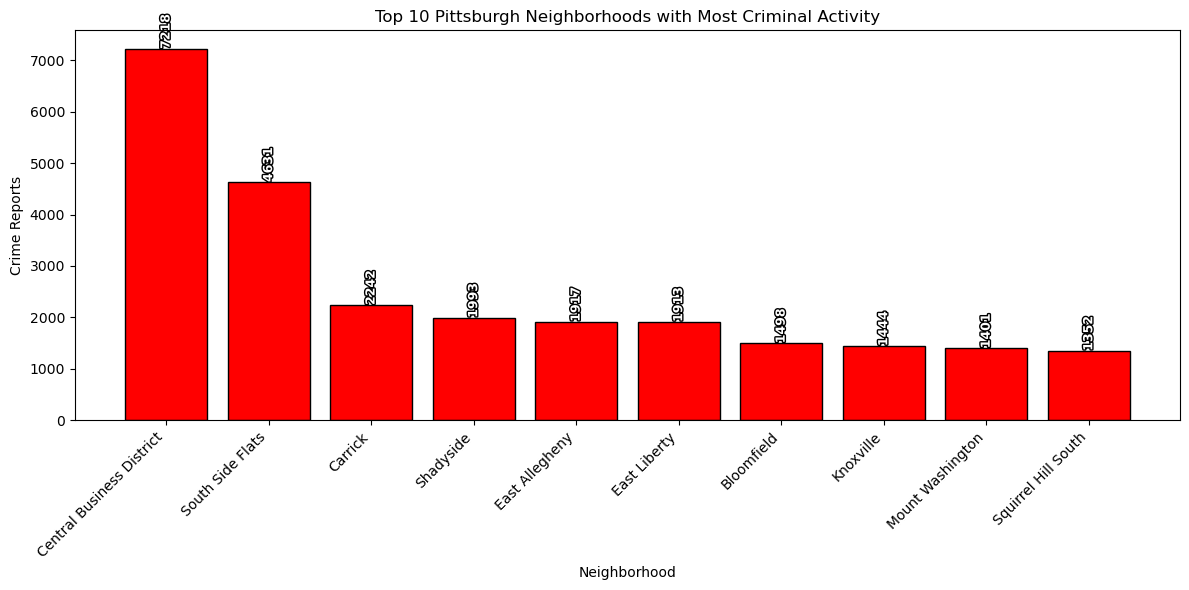

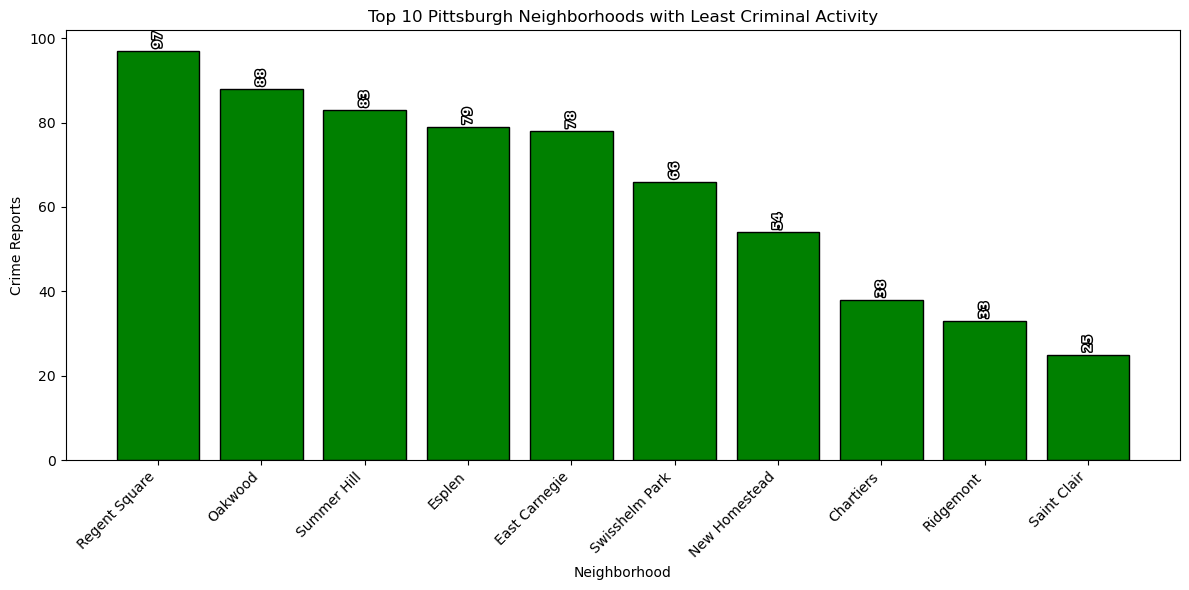

In [10]:
# Count neighborhoods
data = pd.read_csv("Criminal.csv",low_memory = False)
counts = data['Neighborhood'].value_counts()

top10 = counts.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top10.index, top10.values, color='red', edgecolor='black')
plt.title('Top 10 Pittsburgh Neighborhoods with Most Criminal Activity')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Reports')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    txt = plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f'{int(height)}',
        ha='center', va='bottom',
        fontsize=9, fontweight='bold',
        color='white', rotation=90
    )
    txt.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()
    ])

plt.tight_layout()
plt.show()

bottom10 = counts.tail(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(bottom10.index, bottom10.values, color='green', edgecolor='black')
plt.title('Top 10 Pittsburgh Neighborhoods with Least Criminal Activity')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Reports')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    txt = plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f'{int(height)}',
        ha='center', va='bottom',
        fontsize=9, fontweight='bold',
        color='white', rotation=90
    )
    txt.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()
    ])

plt.tight_layout()
plt.show()

In [11]:
points = 100
counts = counts[::-1]
for index, value in counts.items():
    if index in point_dict:
        point_dict[index] += points
    elif index == 'Lincoln–Lemington–Belmar':
        point_dict['Lincoln-Lemington-Belmar'] += points
    elif index == 'Saint Clair':
        point_dict['St. Clair'] += points
    else:
        point_dict[index] = points
    points -= 1

#### Conclusion for Sub-metric 2

The top 10 neighborhoods with the least criminal activity are shown here. I have not been to any of these places personally, but when showing my friend who was raised around here the graph, he agreed with the results. There are many reasons why these neighborhoods in particular have low crime rates, but one of the biggest reasons is that the communities are smaller and, because of this, more tight-knit. Since they are so small the residents of the area get to know each other better and as a result look out for each other.

# Sub-metric 3

This dataset shows the amount of parks in each neighborhood in the city of Pittsburgh. This dataset was created in May 2017 and has not been updated since 2021. In this dataset I made the point system work by neighborhoods who have the most parks get more points while the neighborhoods with the least amount of parks get the least amount of points.

In [12]:
parkData = pd.read_csv("City-Parks.csv")
parkData.columns = parkData.columns.str.lower()
parkCounts = parkData["neighborhood"].value_counts().reset_index()
parkCounts.columns = ["neighborhood", "parkTotal"]
parkCounts["parkPoints"] = 100 - parkCounts.index
parkCounts = parkCounts.sort_values("parkTotal", ascending=False).reset_index(drop=True)

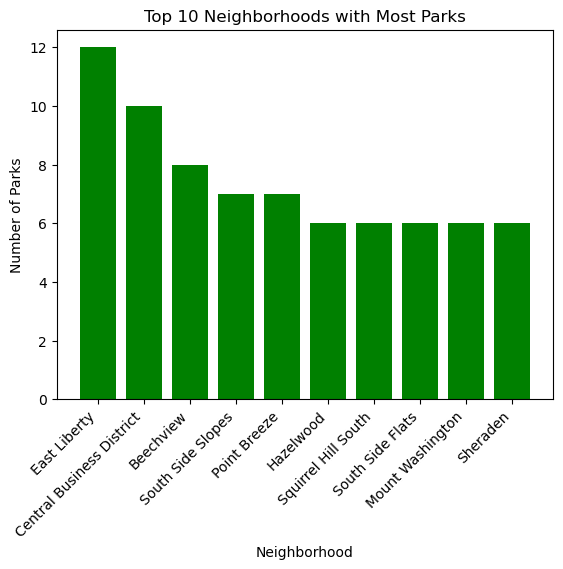

In [13]:
top10 = parkCounts.head(10)
plt.bar(top10["neighborhood"], top10["parkTotal"], color="green")
plt.title("Top 10 Neighborhoods with Most Parks")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Parks")
plt.xticks(rotation=45, ha="right")
plt.show()

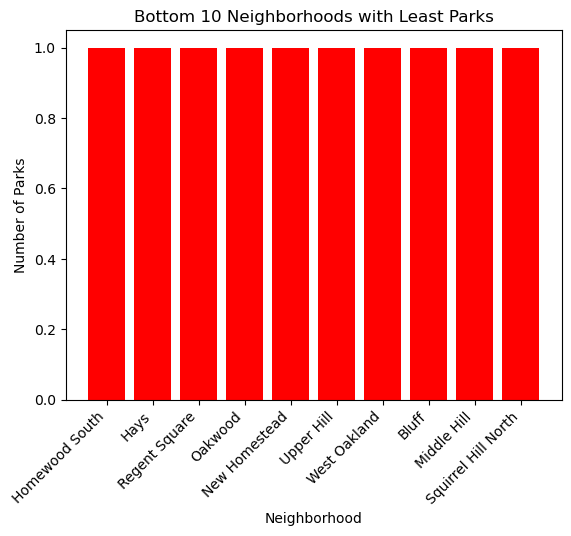

In [7]:
import matplotlib.pyplot as plt

bottom10 = parkCounts.tail(10)
plt.bar(bottom10["neighborhood"], bottom10["parkTotal"], color="red")
plt.title("Bottom 10 Neighborhoods with Least Parks")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Parks")
plt.xticks(rotation=45, ha="right")
plt.show()

In [14]:
points = 100
lastTotal = 12
sameCount = 0
for index, row in parkCounts.iterrows():
    if row.iloc[1] == lastTotal:
        sameCount += 1
    else:
        points -= (sameCount * 1.5)
        sameCount = 1
        lastTotal = row.iloc[1]
    if row.iloc[0] in point_dict:
        point_dict[row.iloc[0]] += points
    else:
        point_dict[row.iloc[0]] = points

#### Conclusion for Sub-metric 3

The neighborhoods that are considered the best in my dataset are used by the metric of how many parks there are per neighborhood. I used this metric because more parks usually means more physical activity inside the community. Physical activity helps people stay healthy physically and mentally. Along with more children being around parks means there will most likely be more road signs that require drivers to go slower within the specific area. To add on to this, neighborhoods with more parks means it can be a better place to settle down if you are considering on having kids and is probably better than being in a neighborhood with no parks which doesn't allow for as much oppurtunity for playing and connecting with the community.

# Combined Metric

Swisshelm Park         266.0
Westwood               235.0
East Carnegie          219.0
Regent Square          216.0
Spring Garden          214.0
Upper Lawrenceville    214.0
Oakwood                213.0
New Homestead          211.0
Polish Hill            208.0
West End               206.0
dtype: float64


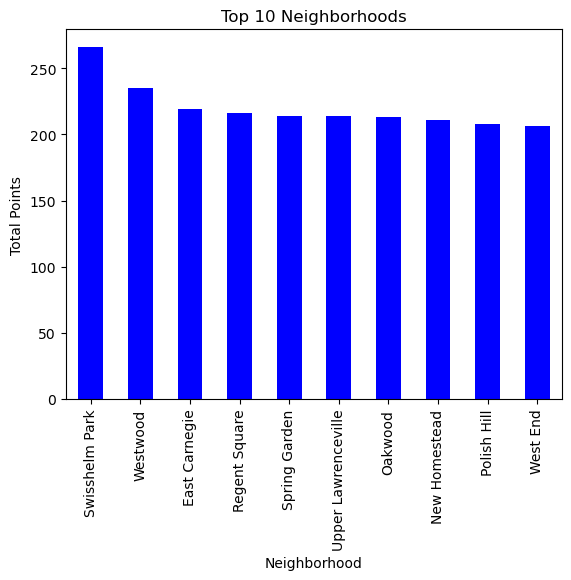

In [24]:
ranked_series = pd.Series(point_dict)
ranked_series = ranked_series.sort_values(ascending=False)
print(ranked_series.head(10))
best = ranked_series.head(10)
best.plot(kind='bar', color = 'blue', title = 'Top 10 Neighborhoods', xlabel = 'Neighborhood', ylabel = 'Total Points')
plt.show()

# Conclusion

Based on our metrics of safety and wellbeing which puts the fire incidents, criminal activity, and park availability data together we found the best neighborhood who has strengths in each of these three aspects. Neighborhoods who had less fire incidents and criminal activity gained higher points while neighborhoods with more parks gained higher points. By getting all the scores together from each dataset we were able to decide that Swisshelm Park is considered the best neighborhood in Pittsburgh from the data we analyzed.

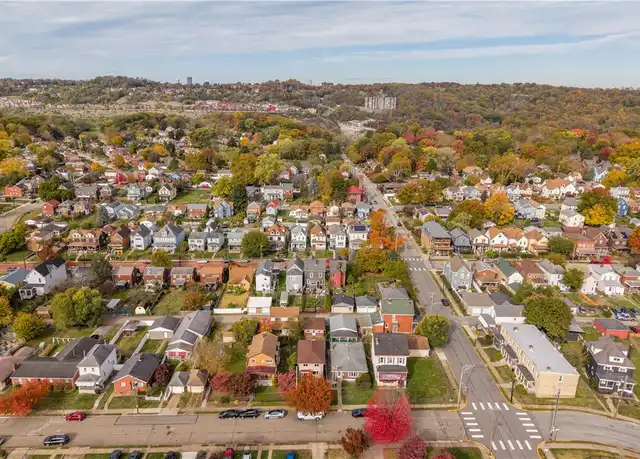